In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

In [7]:
# Charge le premier dataset (modèle de création)
df_train = pd.read_csv("Datasets/Spam detection - For model creation.csv", sep=";")

# Préparation des données pour le premier dataset
X_train = df_train.drop('GOAL-Spam', axis=1)  # Caractéristiques
y_train = df_train['GOAL-Spam']  # Cible (Yes ou No)

# Conversion des étiquettes en format numérique
y_train = y_train.map({'No': 0, 'Yes': 1})

# Charge le second dataset (pour prédiction)
df_pred = pd.read_csv("Datasets/Spam detection - For prediction.csv", sep=",")

X_pred = df_pred[X_train.columns]  # Caractéristiques du dataset de prédiction

In [8]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_pred_scaled = scaler.transform(X_pred)  # Normalisation du dataset de prédiction

# Liste des modèles à tester
models = {
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

entrainement du module : Logistic Regression
--- Logistic Regression ---
précision (train): 0.9566
Rappel (train): 0.9038
F1-Score (train): 0.9294
Accuracy (train): 0.9415


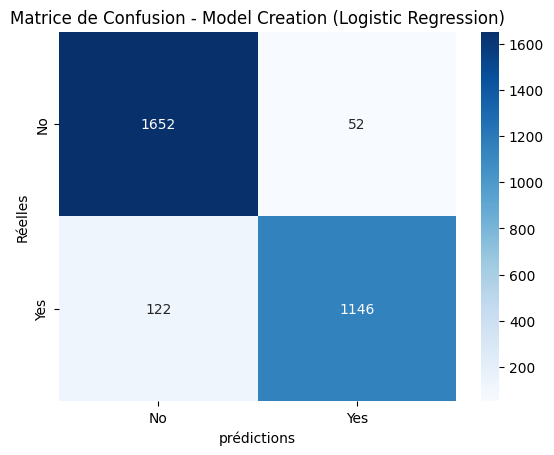

prédictions sur le dataset de prédiction (Logistic Regression):
[0 1 1 ... 1 1 1]


entrainement du module : Neural Network
--- Neural Network ---
précision (train): 0.9889
Rappel (train): 0.9819
F1-Score (train): 0.9854
Accuracy (train): 0.9876


/home/brofessor/Documents/M1-EFREI-Introduction-Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


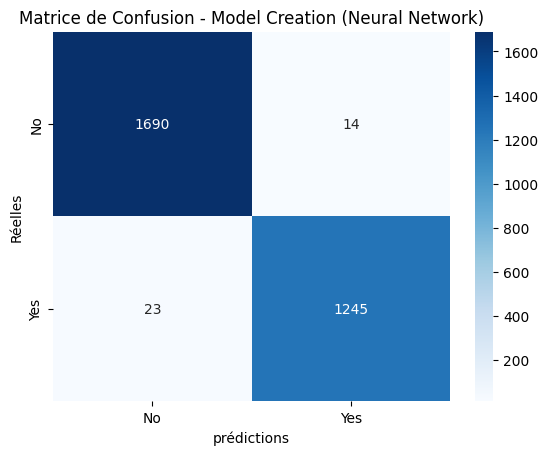

prédictions sur le dataset de prédiction (Neural Network):
[0 0 1 ... 1 1 1]


entrainement du module : SVM
--- SVM ---
précision (train): 0.9627
Rappel (train): 0.9172
F1-Score (train): 0.9394
Accuracy (train): 0.9495


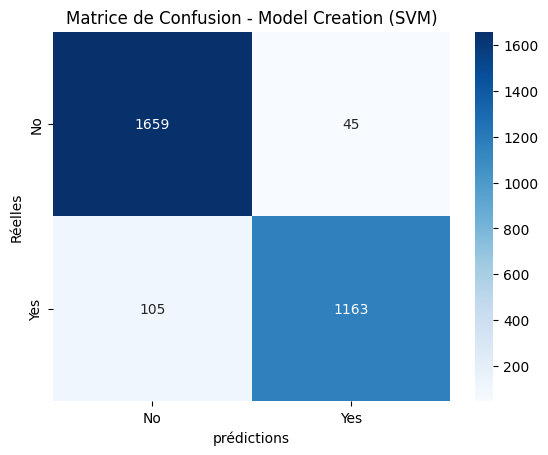

prédictions sur le dataset de prédiction (SVM):
[0 1 1 ... 1 1 1]


entrainement du module : Gradient Boosting
--- Gradient Boosting ---
précision (train): 0.9769
Rappel (train): 0.9345
F1-Score (train): 0.9553
Accuracy (train): 0.9627


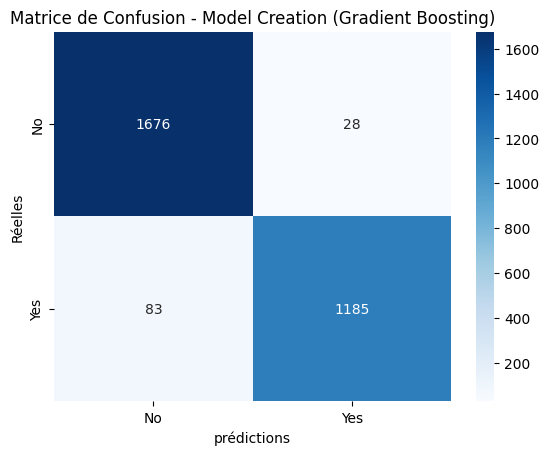

prédictions sur le dataset de prédiction (Gradient Boosting):
[0 0 1 ... 1 1 1]


entrainement du module : Decision Tree
--- Decision Tree ---
précision (train): 0.9992
Rappel (train): 0.9945
F1-Score (train): 0.9968
Accuracy (train): 0.9973


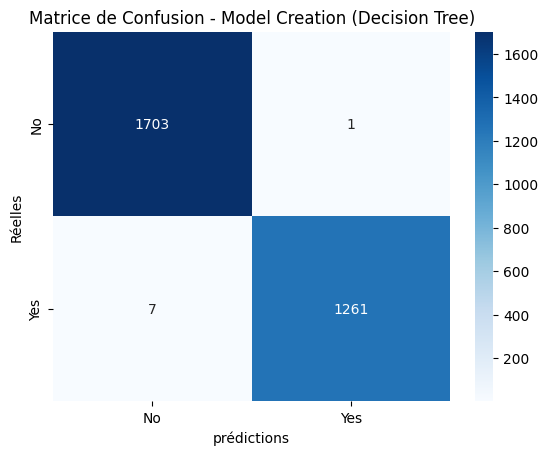

prédictions sur le dataset de prédiction (Decision Tree):
[0 0 1 ... 1 1 1]


entrainement du module : Random Forest
--- Random Forest ---
précision (train): 0.9984
Rappel (train): 0.9953
F1-Score (train): 0.9968
Accuracy (train): 0.9973


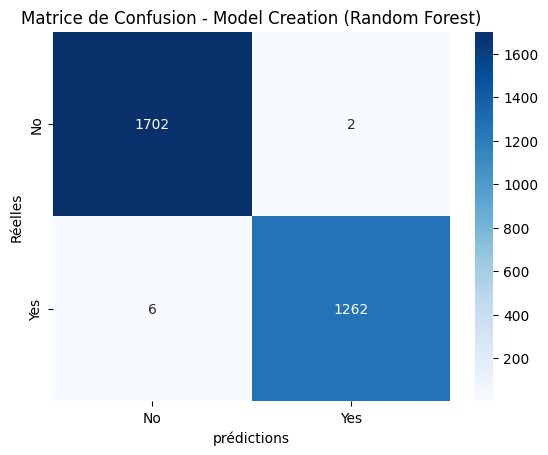

prédictions sur le dataset de prédiction (Random Forest):
[0 0 1 ... 1 1 1]


entrainement du module : XGBoost
--- XGBoost ---
précision (train): 0.9968
Rappel (train): 0.9897
F1-Score (train): 0.9933
Accuracy (train): 0.9943


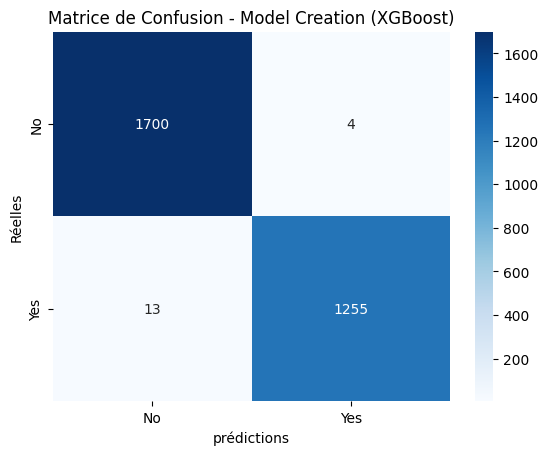

prédictions sur le dataset de prédiction (XGBoost):
[0 0 1 ... 1 1 1]




In [9]:
# Construction et évaluation des modèles
for model_name, model in models.items():
    print(f"entrainement du module : {model_name}")

    # Entrainement du modle
    model.fit(X_train_scaled, y_train)

    # prédictions sur les données d'entrainement et de prédiction
    y_train_pred = model.predict(X_train_scaled)
    y_pred_pred = model.predict(X_pred_scaled)  # prédictions sur le second dataset

    # Calcul des métriques pour l'ensemble d'entrainement
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Affichage des résultats
    print(f"--- {model_name} ---")
    print(f"précision (train): {precision_train:.4f}")
    print(f"Rappel (train): {recall_train:.4f}")
    print(f"F1-Score (train): {f1_train:.4f}")
    print(f"Accuracy (train): {accuracy_train:.4f}")

    # Matrice de confusion pour les données d'entrainenement
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Matrice de Confusion - ({model_name})')
    plt.xlabel('prédictions')
    plt.ylabel('Réelles')
    plt.show()

    # Affichage des prédictions
    print(f"prédictions sur le dataset de prédiction ({model_name}):")
    print(y_pred_pred)
    print("\n")